# Step 1: Understand the Problem Statement
Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

Features available are:

sex: insurance contractor gender, female, male

bmi: Body mass index (ideally 18.5 to 24.9)

children: Number of children covered by health insurance / Number of dependents

smoker: smoking habits

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# Step 2: Import Libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# read the csv file 
survey_responses = pd.read_csv('survey_responses.csv')
# read the csv file 
user_activity = pd.read_csv('user_activity.csv')


In [75]:
#duplicate_product = survey_responses.groupby('userid').filter(lambda x: len(x) <= 10)
#duplic_ids = duplicate_product['userid'].values

duplicate_product = survey_responses[['userid']]
duplicate_product.shape

(5311, 1)

In [90]:

review_count = pd.DataFrame(survey_responses[survey_responses['userid'].isin(duplic_ids)]['userid'].value_counts())
review_count.reset_index(inplace=True)
review_count.columns = ['userid','count']
duplicated_df = pd.merge(duplicate_product, review_count, on='userid')
display(duplicated_df)
## Getting duplicates with low review count
duplicated_df.sort_values(by=['userid','count'],ascending=[True,False])
duplicated_ids = duplicated_df.drop_duplicates(subset ="userid", 
                     keep = 'last', inplace = False)['userid']

Index(['index', 'userid'], dtype='object')

<AxesSubplot:title={'center':'count'}>

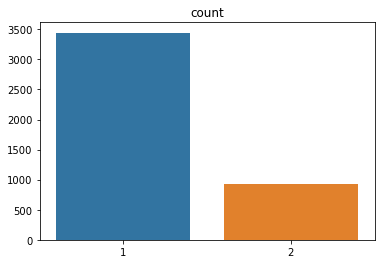

In [72]:

plt.title('count')

sns.barplot(x=round(review_count['count']).value_counts().keys(),
            y=round(review_count['count']).value_counts().values)

In [6]:
print(survey_responses.shape)
print(user_activity.shape)

(5311, 4)
(60548, 4)


In [56]:
df_filtered = survey_responses[survey_responses.userid == 'bOxGMyVKjdnvFzOvDDc0NuNuEaE=']
df_filtered

,userid,mobilePlatform,tenureDay,waiBondSubscore
5085,bOxGMyVKjdnvFzOvDDc0NuNuEaE=,android,4,3.75
5236,bOxGMyVKjdnvFzOvDDc0NuNuEaE=,android,14,4.00


In [8]:
user_activity.head(2)

,userid,tenureDay,userMessages,moodCategory
0,rLzw2UmRCEe46MtW5gES+bx5uRU=,0,45,neutral
1,V0EzPowhWQCxtw1Xtxv2l9RrJ0k=,0,70,NaN


In [20]:
df = pd.merge(user_activity,survey_responses, how='left', left_on = 'userid', right_on = 'userid')
print(df_cd.shape)
df.head(2)

(77954, 7)


,userid,tenureDay_x,userMessages,moodCategory,mobilePlatform,tenureDay_y,waiBondSubscore
0,rLzw2UmRCEe46MtW5gES+bx5uRU=,0,45,neutral,android,4,3.25
1,V0EzPowhWQCxtw1Xtxv2l9RrJ0k=,0,70,NaN,android,6,4.50


# Step 3: Perform Exploratory Data Analysis

<AxesSubplot:>

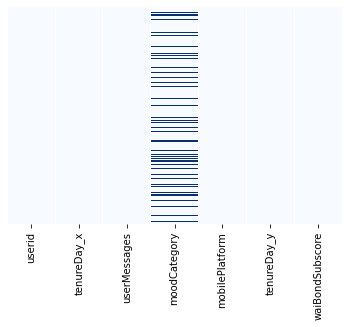

In [24]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [21]:
# check if there are any Null values
df.isnull().sum()

userid                 0
tenureDay_x            0
userMessages           0
moodCategory       13353
mobilePlatform         0
tenureDay_y            0
waiBondSubscore        0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77954 entries, 0 to 77953
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userid           77954 non-null  object 
 1   tenureDay_x      77954 non-null  int64  
 2   userMessages     77954 non-null  int64  
 3   moodCategory     64601 non-null  object 
 4   mobilePlatform   77954 non-null  object 
 5   tenureDay_y      77954 non-null  int64  
 6   waiBondSubscore  77954 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.8+ MB


In [29]:
#moodCategory las lots of null values... so need to deal with missing data

In [26]:
corr = df.corr()
corr

,tenureDay_x,userMessages,tenureDay_y,waiBondSubscore
tenureDay_x,1.000000,-0.245246,0.074757,0.014014
userMessages,-0.245246,1.000000,-0.019578,-0.015789
tenureDay_y,0.074757,-0.019578,1.000000,0.124476
waiBondSubscore,0.014014,-0.015789,0.124476,1.000000


<AxesSubplot:>

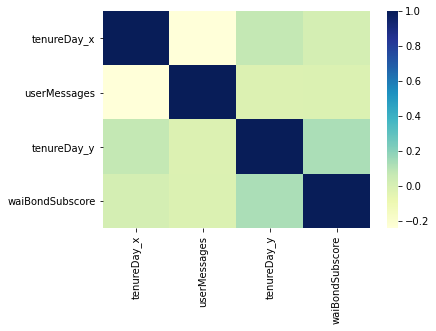

In [27]:
sns.heatmap(corr,cmap="YlGnBu")

In [ ]:
ax=plt.figure()
ax=sns.distplot(df[df['Exit'] == 1]['Turnover'], color = 'b',label='Yes')
ax=sns.distplot(df[df['Exit'] == 0]['Turnover'], color = 'r',label='No')

ax.legend(title='Exited')
ML_Visuals.savefig()

C:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenureDay_x', ylabel='Density'>

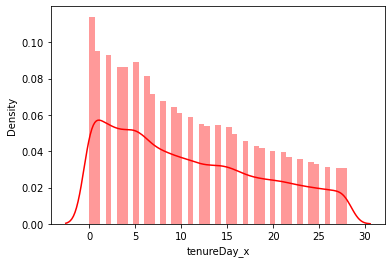

In [98]:
sns.distplot( df.tenureDay_x, color = 'r')

C:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenureDay_y', ylabel='Density'>

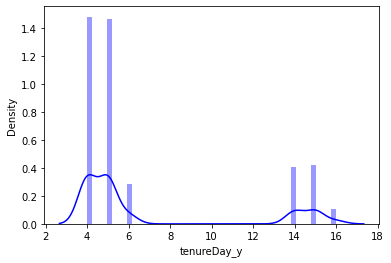

In [94]:

sns.distplot( df.tenureDay_y, color = 'b')

In [100]:
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

In [102]:
df['mobilePlatform']

0        android
1        android
2            ios
3            ios
4        android
          ...   
77949    android
77950    android
77951    android
77952        ios
77953        ios
Name: mobilePlatform, Length: 77954, dtype: object

<AxesSubplot:title={'center':'tenureDay'}>

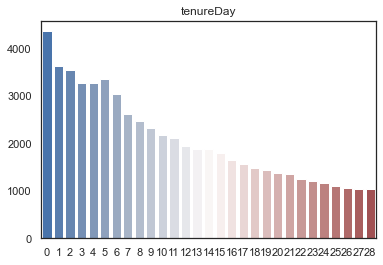

In [118]:
plt.title('tenureDay')
sns.barplot(x=(user_activity['tenureDay']).value_counts().keys(),
            y=(user_activity['tenureDay']).value_counts().values,palette="vlag")

Text(0, 0.5, 'Count')

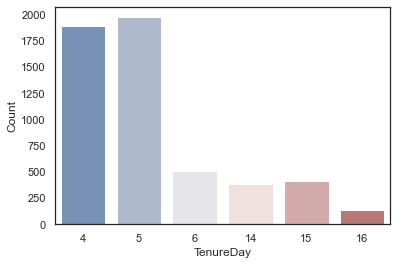

In [125]:
ax=sns.countplot(x="tenureDay",palette="vlag",data=survey_responses)
ax.set_xlabel("TenureDay")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

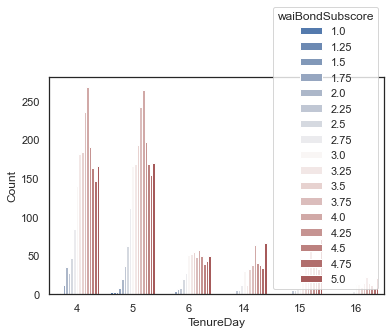

In [131]:
ax=sns.countplot(x="tenureDay",hue="waiBondSubscore",palette="vlag",data=survey_responses)
ax.set_xlabel("TenureDay")
ax.set_ylabel("Count")

In [138]:
user_activity.head()

,userid,tenureDay,userMessages,moodCategory
0,rLzw2UmRCEe46MtW5gES+bx5uRU=,0,45,neutral
1,V0EzPowhWQCxtw1Xtxv2l9RrJ0k=,0,70,NaN
2,bNQ0Y1NqoS4K4jwNTOQlR1dJHlQ=,0,83,NaN
3,6nO/an2GbB8cg/dDVm0qzc5kfag=,0,61,NaN
4,JM3fV1nBKwLHxhduyB8Are4RTAQ=,0,93,negative


C:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'tenureDay'}, xlabel='tenureDay', ylabel='Density'>

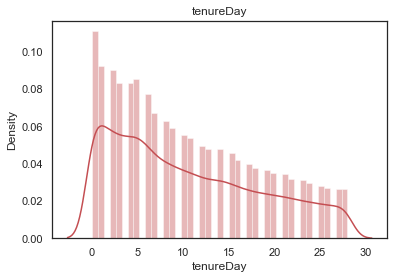

In [143]:
plt.title('tenureDay')

sns.distplot( user_activity['tenureDay'], color = 'r')

C:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='userMessages', ylabel='Density'>

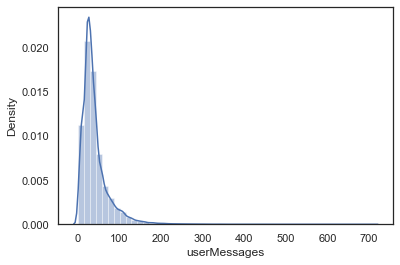

In [144]:

sns.distplot( user_activity['userMessages'], color = 'b')

In [ ]:


ax=sns.countplot(x="userMessages",palette="vlag",data=user_activity)
ax.set_xlabel("Credit Rating")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

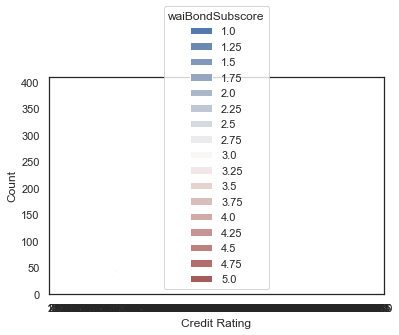

In [121]:


ax=sns.countplot(x="userMessages",hue="waiBondSubscore",palette="vlag",data=survey_responses)
ax.set_xlabel("Credit Rating")
ax.set_ylabel("Count")


Text(0, 0.5, 'Count')

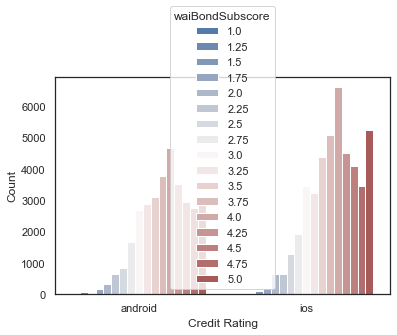

In [112]:
ax=sns.countplot(x="mobilePlatform",hue="waiBondSubscore",palette="vlag",data=df)
ax.set_xlabel("Credit Rating")
ax.set_ylabel("Count")